In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008.nc')
 

data

<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (time: 95, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-02-01 1998-03-01 ... 2005-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980201 19980301 19980401 ... 20051101 20051201
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (time: 32, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-09-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20050801 20050901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,0.25)
jjas_data = jjas_data.interp(lon=new_lon,lat=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:  (time: 32, lat: 40, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-09-01
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20050801 20050901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float64 0.4308 0.3221 0.2765 ... 0.1774 0.1441
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [8]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (lat: 40, lon: 32)>
array([[0.36424099, 0.37230343, 0.37556934, ..., 0.92753743, 0.87774413,
        0.7401172 ],
       [0.34889041, 0.35808088, 0.37171274, ..., 0.83811737, 0.85462887,
        0.76615154],
       [0.35725656, 0.3810575 , 0.38026427, ..., 0.77830642, 0.72501694,
        0.73013412],
       ...,
       [0.30676399, 0.28645704, 0.2692595 , ..., 0.31475378, 0.32605261,
        0.37545073],
       [0.31019293, 0.28211734, 0.25408416, ..., 0.29370044, 0.29596804,
        0.31669719],
       [0.27611407, 0.25033029, 0.21442228, ..., 0.30539278, 0.32262473,
        0.30854961]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [9]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean*24
 


trmm = pr_mm

In [10]:
#opening the gcm mpi data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/MPI-ESM-MR/pr_Amon_MPI-ESM-MR_historical_r1i1p1_185001-200512.nc')

data

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [11]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 95, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-16T12:00:00 ... 2005-11-16
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1998-01-01 1998-02-01 ... 2005-12-01
    lat_bnds   (lat, bnds) float64 -90.0 -87.65 -87.65 ... 87.65 87.65 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [12]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 32, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1998-06-16 ... 2005-09-16
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-10-01
    lat_bnds   (lat, bnds) float64 -90.0 -87.65 -87.65 ... 87.65 87.65 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [13]:
#jjas_data.x.values
#jjas_data.y.values


In [14]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,0.25)
jjas_data = jjas_data.interp(lon=new_lon,lat=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:    (time: 32, bnds: 2, lat: 40, lon: 32)
Coordinates:
  * time       (time) datetime64[ns] 1998-06-16 ... 2005-09-16
  * lon        (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-10-01
    lat_bnds   (lat, bnds) float64 17.19 19.06 17.44 19.31 ... 28.56 26.94 28.81
    lon_bnds   (lon, bnds) float64 85.19 87.06 85.44 87.31 ... 94.56 92.94 94.81
    pr         (time, lat, lon) float64 4.646e-05 4.935e-05 ... 0.0001983
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [15]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[1.03858504e-04, 1.03805406e-04, 1.07060496e-04, ...,
        1.42281937e-04, 1.38917777e-04, 1.36779043e-04],
       [9.67682484e-05, 9.67770213e-05, 9.99747738e-05, ...,
        1.37814812e-04, 1.33609751e-04, 1.30766161e-04],
       [8.96779926e-05, 8.97486367e-05, 9.28890515e-05, ...,
        1.33347688e-04, 1.28301726e-04, 1.24753279e-04],
       ...,
       [2.09719087e-04, 2.17979197e-04, 2.24267922e-04, ...,
        1.93926009e-04, 1.85343952e-04, 1.77169625e-04],
       [2.02068613e-04, 2.08606230e-04, 2.13293847e-04, ...,
        1.93672530e-04, 1.87787145e-04, 1.81508233e-04],
       [1.94418139e-04, 1.99233263e-04, 2.02319771e-04, ...,
        1.93419051e-04, 1.90230339e-04, 1.85846842e-04]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [16]:
mpi = jjas_mean*86400
mpi

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[ 8.97337476,  8.96878707,  9.25002687, ..., 12.29315936,
        12.00249589, 11.81770935],
       [ 8.36077666,  8.36153464,  8.63782046, ..., 11.90719979,
        11.54388252, 11.29819635],
       [ 7.74817856,  7.75428221,  8.02561405, ..., 11.52124022,
        11.08526916, 10.77868334],
       ...,
       [18.11972911, 18.83340262, 19.3767485 , ..., 16.75520715,
        16.01371745, 15.30745564],
       [17.45872815, 18.02357829, 18.42858837, ..., 16.73330656,
        16.22480936, 15.68231137],
       [16.79772719, 17.21375397, 17.48042824, ..., 16.71140597,
        16.43590126, 16.05716711]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [17]:
bias = mpi - trmm
bias

<xarray.DataArray (lat: 40, lon: 32)>
array([[ 2.31590887e-01,  3.35046685e-02,  2.36362778e-01, ...,
        -9.96773887e+00, -9.06336325e+00, -5.94510351e+00],
       [-1.25932819e-02, -2.32406450e-01, -2.83285320e-01, ...,
        -8.20761719e+00, -8.96721045e+00, -7.08944055e+00],
       [-8.25978933e-01, -1.39109771e+00, -1.10072837e+00, ...,
        -7.15811395e+00, -6.31513729e+00, -6.74453564e+00],
       ...,
       [ 1.07573935e+01,  1.19584337e+01,  1.29145206e+01, ...,
         9.20111647e+00,  8.18845483e+00,  6.29663804e+00],
       [ 1.00140979e+01,  1.12527621e+01,  1.23305685e+01, ...,
         9.68449596e+00,  9.12157642e+00,  8.08157888e+00],
       [ 1.01709894e+01,  1.12058270e+01,  1.23342936e+01, ...,
         9.38197931e+00,  8.69290773e+00,  8.65197648e+00]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [18]:
bias_percentage = ((mpi - trmm)/trmm)*100
bias_percentage

<xarray.DataArray (lat: 40, lon: 32)>
array([[ 2.64924059e+00,  3.74970449e-01,  2.62227187e+00, ...,
        -4.47768943e+01, -4.30239431e+01, -3.34693810e+01],
       [-1.50396818e-01, -2.70430584e+00, -3.17545075e+00, ...,
        -4.08038373e+01, -4.37188328e+01, -3.85554739e+01],
       [-9.63335387e+00, -1.52109340e+01, -1.20610023e+01, ...,
        -3.83209927e+01, -3.62930447e+01, -3.84891363e+01],
       ...,
       [ 1.46113869e+02,  1.73941639e+02,  1.99846257e+02, ...,
         1.21803098e+02,  1.04641278e+02,  6.98786539e+01],
       [ 1.34514375e+02,  1.66195063e+02,  2.02206104e+02, ...,
         1.37391916e+02,  1.28414435e+02,  1.06326316e+02],
       [ 1.53484108e+02,  1.86517365e+02,  2.39680741e+02, ...,
         1.28004273e+02,  1.12268049e+02,  1.16836647e+02]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

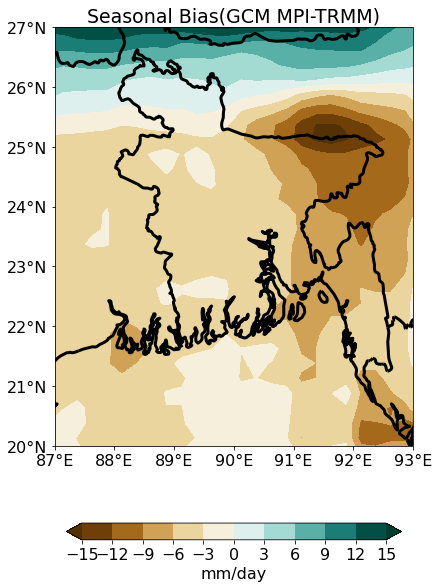

In [23]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['lon'], bias['lat'],bias[:,:],
                levels=np.arange(-15,15+3,3),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, ticks=np.arange(-15,15+3,3),orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)




plt.title('Seasonal Bias(GCM MPI-TRMM)',fontsize=19)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(gcm mpi-trmm).png")



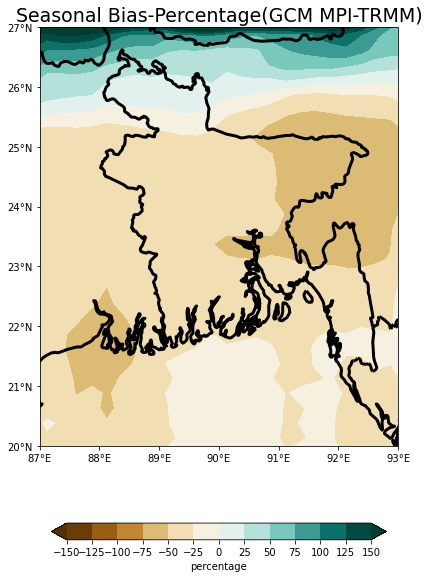

In [20]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['lon'], bias_percentage['lat'],bias_percentage[:,:],
                levels=np.arange(-150,150+25,25), transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25), orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)


plt.title('Seasonal Bias-Percentage(GCM MPI-TRMM)',fontsize=19)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(gcm mpi-trmm).png")







In [21]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r